# Import Tools

In [1]:
#import EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#import modeling tools
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

# Load Data

In [2]:
#load dataset
df = pd.read_csv("../input/uci-semcom/uci-secom.csv",
                 parse_dates=["Time"])
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB


# Handling The Missing Values

In [4]:
missing=df.isna().sum()
missing

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

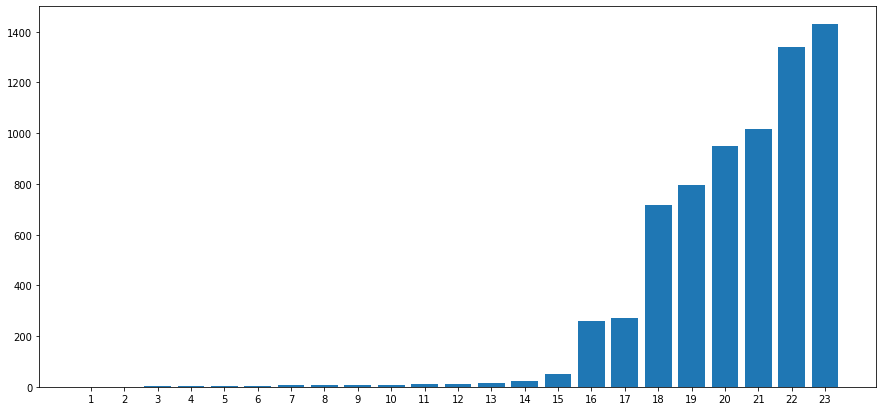

In [5]:
#visualize the unique missing values
fig = plt.subplots(figsize=(15,7))

plt.bar(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1),
       missing.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1));

In [6]:
#Let's handle missing values with mean
df1=df.drop("Time", axis=1)
for label,content in df1.items():
    df1[label]=content.fillna(content.mean())

# Feature Engineering

In [7]:
#Now let's convert Time to separate columns of Year, Month, Day, Day of year and Day of week .
#this step is important because the time data cannot be preprocessed in first format.
df1["Year"]= df.Time.dt.year
df1["Month"]= df.Time.dt.month
df1["Day"]= df.Time.dt.day
df1["DayOfWeek"]= df.Time.dt.dayofweek
df1["DayOfYear"]= df.Time.dt.dayofyear

In [8]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,586,587,588,589,Pass/Fail,Year,Month,Day,DayOfWeek,DayOfYear
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.021458,0.016475,0.005283,99.670066,-1,2008,7,19,5,201
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.009600,0.020100,0.006000,208.204500,-1,2008,7,19,5,201
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.058400,0.048400,0.014800,82.860200,1,2008,7,19,5,201
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.020200,0.014900,0.004400,73.843200,-1,2008,7,19,5,201
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.020200,0.014900,0.004400,73.843200,-1,2008,7,19,5,201


In [9]:
#Find the features with one value
features_with_one_value=[]
for label,content in df1.items():
    if df1[label].nunique()==1:
        features_with_one_value.append(label)
    
print(features_with_one_value, len(features_with_one_value))
        

['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', 'Year'] 117


In [10]:
#drop features with one value  
for label,content in df1.items():
    if df1[label].nunique()==1:
        df1.drop(label, axis=1, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 479 entries, 0 to DayOfYear
dtypes: float64(474), int64(5)
memory usage: 5.7 MB


In [12]:
df1.head()

,0,1,2,3,4,6,7,8,9,10,...,585,586,587,588,589,Pass/Fail,Month,Day,DayOfWeek,DayOfYear
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,2.3630,0.021458,0.016475,0.005283,99.670066,-1,7,19,5,201
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,4.4447,0.009600,0.020100,0.006000,208.204500,-1,7,19,5,201
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,3.1745,0.058400,0.048400,0.014800,82.860200,1,7,19,5,201
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,2.0544,0.020200,0.014900,0.004400,73.843200,-1,7,19,5,201
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,99.3032,0.020200,0.014900,0.004400,73.843200,-1,7,19,5,201


In [13]:
#Split data into X,y
X = df1.drop("Pass/Fail", axis=1)
y = df1["Pass/Fail"]

### Try to use Mutual Info to select most important features

In [14]:
#Using mutual information classif to select important features
importances = mutual_info_classif(X, y)
f_importances = pd.Series(importances, df1.columns[0:len(df1.columns)-1])
df_importances = pd.DataFrame(f_importances.sort_values()[::-1], columns=["MI_Score"])
df_importances

,MI_Score
443,0.031493
577,0.030345
406,0.029176
41,0.028798
128,0.027588
...,...
332,0.000000
335,0.000000
336,0.000000
337,0.000000


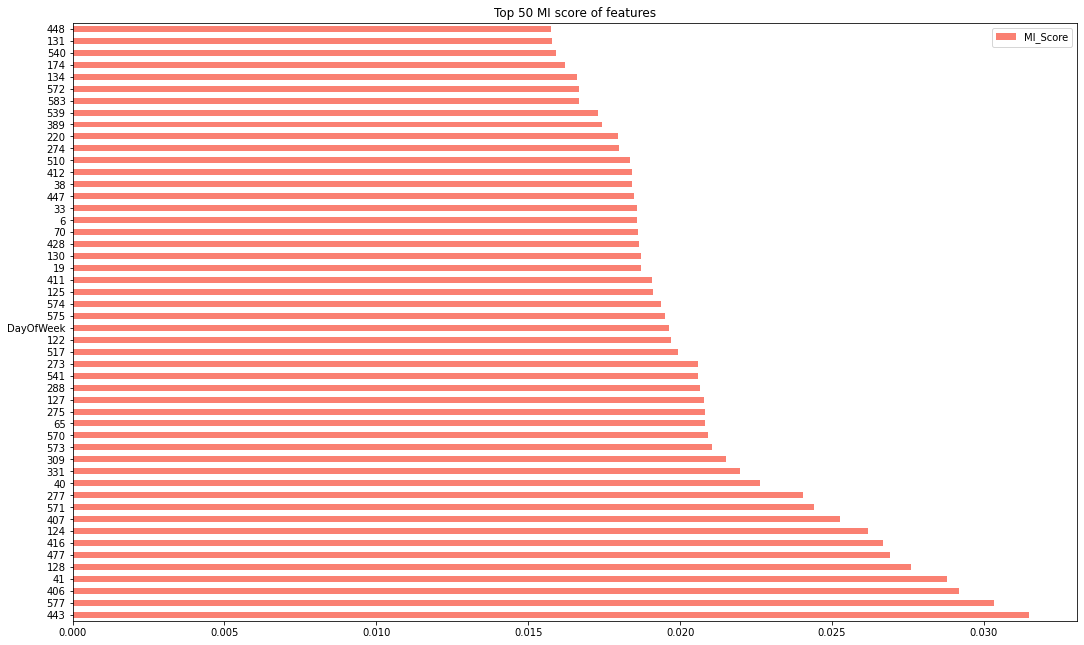

In [15]:
#visualize top 50 MI Score
df_importances[:50].plot(kind="barh", color="salmon", figsize=(18,11), title=("Top 50 MI score of features"));

In [16]:
df_importances.describe()

,MI_Score
count,478.000000
mean,0.005775
std,0.006959
min,0.000000
25%,0.000000
50%,0.002922
75%,0.009991
max,0.031493


In [17]:
#Let's drop features with MI score = 0
drop_list = df_importances.index[df_importances['MI_Score'] == 0].tolist()
f_importances.drop(drop_list, inplace=True)

### Try to add cluster as feature by using KMeans

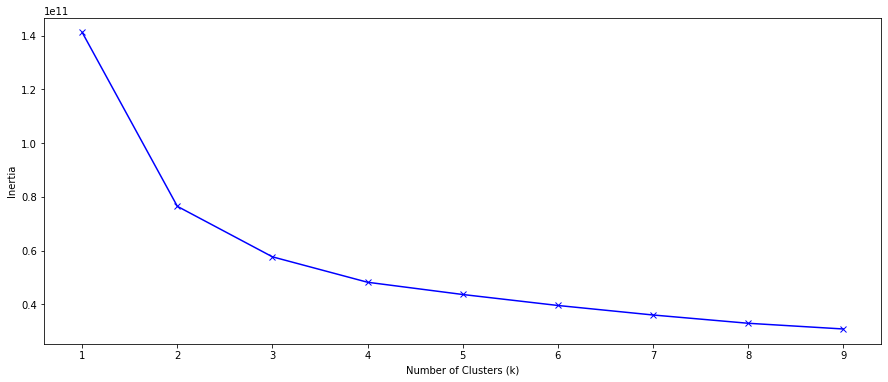

In [18]:
#Using Elbow Method to determine suitable number of clusters
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

* Choosing 2 as number of clusters

In [19]:
# Create cluster feature
kmeans = KMeans(n_clusters=2)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,0,1,2,3,4,6,7,8,9,10,...,585,586,587,588,589,Month,Day,DayOfWeek,DayOfYear,Cluster
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,2.3630,0.021458,0.016475,0.005283,99.670066,7,19,5,201,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,4.4447,0.009600,0.020100,0.006000,208.204500,7,19,5,201,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,3.1745,0.058400,0.048400,0.014800,82.860200,7,19,5,201,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,2.0544,0.020200,0.014900,0.004400,73.843200,7,19,5,201,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,99.3032,0.020200,0.014900,0.004400,73.843200,7,19,5,201,0


# Train Model
### using :
* RandomForestClassifier
* KNN
* DecisionTreeClassifier
* SVM

In [20]:
#preparing the models
models={"RandomForestClassifier":RandomForestClassifier(),
       "KNN":KNeighborsClassifier(),
       "DecisionTreeClassifier":tree.DecisionTreeClassifier(),
       "svm":svm.SVC()}

In [21]:
#Split data to train and test parts
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_train , X_test, y_train, y_test = train_test_split(scaled_data,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=160)

np.random.seed(42)

#fitting the models and compare their metrics
scores={}
for name,model in models.items():
    clf=model.fit(X_train,y_train)
    scores[name]=clf.score(X_test,y_test)
    
scores

{'RandomForestClassifier': 0.9554140127388535,
 'KNN': 0.9522292993630573,
 'DecisionTreeClassifier': 0.8789808917197452,
 'svm': 0.9554140127388535}

* Choosing RandomForestClassification to tune hyperprameters

# Tunning The Hyperprameters

In [22]:
### Tuning Hyperprameters : RandomForestClassifier

rfc_grid={"n_estimators":np.arange(10,2000,10),
         "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,10,2),
         "min_samples_split":np.arange(2,20,2),
         "bootstrap":[True,False]}

rfc_mdl=RandomizedSearchCV(estimator=RandomForestClassifier(),
                          param_distributions=rfc_grid,
                          n_iter=30,
                          cv=5,
                          verbose=True)

rfc_mdl.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 41.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  21...
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760,
       1770, 1780, 1790, 

In [23]:
rfc_mdl.best_params_

{'n_estimators': 1580,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None,
 'bootstrap': False}

In [24]:
rfc_mdl.score(X_test,y_test)

0.9554140127388535

# Model Evaluation

In [25]:
#preparing evaluate_model function
def evaluate_model(model):
    y_pred=model.predict(X_test)
    y_true=y_test
    
    scores={
        "Precision":"{:.2f}".format(precision_score(y_true, y_pred, zero_division=0)*100),
        "Recall":"{:.2f}".format(recall_score(y_true, y_pred)*100),
        "f1":"{:.2f}".format(f1_score(y_true, y_pred)*100),
        "Accuracy":"{:.2f}".format(accuracy_score(y_true, y_pred)*100)}
    
    plot_confusion_matrix(model,
                         X_test,
                         y_test)
    
    plot_roc_curve(model,
                  X_test,
                  y_test);
    
    return scores

{'Precision': '0.00', 'Recall': '0.00', 'f1': '0.00', 'Accuracy': '95.54'}

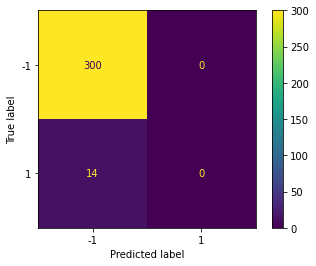

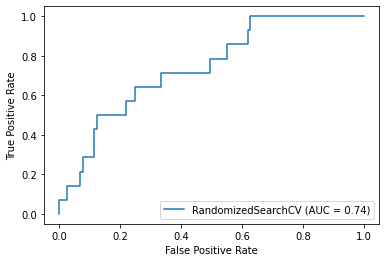

In [26]:
evaluate_model(rfc_mdl)

* Wow! This dataset is too imbalanced! So Let's try MCC to evaluate.

In [27]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, rfc_mdl.predict(X_test))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

* I really get confused with this imbalanced dataset! :|

In [28]:
import pickle
pickle.dump(rfc_mdl, open("Rfc.pkl","wb"))

In [29]:
import pickle
loaded_rfc_mdl = pickle.load(open("Rfc.pkl", 'rb'))
loaded_rfc_mdl.score(X_test,y_test)

0.9554140127388535